# Load Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.options.display.float_format = '{:,.2f}'.format

# Load Data

In [2]:
df = pd.read_excel('Chapter4_Figure4pt4_DataOnly.xlsx')

In [3]:
df

,ID,VendorNum,Date,InvNum,Amount
0,1,2001,2010-01-01,4242J10,25.19
1,2,2001,2010-01-01,7899J10,25.86
2,3,2001,2010-01-01,3830J10,26.57
3,4,2001,2010-01-01,9514J10,27.83
4,5,2001,2010-01-01,6296J10,28.09
...,...,...,...,...,...
189465,189466,52935,2010-07-01,270221266736,33.46
189466,189467,52936,2010-07-01,270348386110,61.52
189467,189468,52937,2010-02-01,271253401514,12.36
189468,189469,52938,2010-02-01,261715090450,8.02


# Variabel baru berisi data dengan kolom Amount >= 10

In [4]:
data = df[df['Amount'] >= 10][['ID', 'Amount']]

In [5]:
data

,ID,Amount
0,1,25.19
1,2,25.86
2,3,26.57
3,4,27.83
4,5,28.09
...,...,...
189464,189465,11.88
189465,189466,33.46
189466,189467,61.52
189467,189468,12.36


# Kolom baru berisi Amount x 100

In [6]:
data['Amount100'] = data['Amount'] * 100

In [7]:
data

,ID,Amount,Amount100
0,1,25.19,"2,519.00"
1,2,25.86,"2,586.00"
2,3,26.57,"2,657.00"
3,4,27.83,"2,783.00"
4,5,28.09,"2,809.00"
...,...,...,...
189464,189465,11.88,"1,188.00"
189465,189466,33.46,"3,346.00"
189466,189467,61.52,"6,152.00"
189467,189468,12.36,"1,236.00"


# Kolom baru mengambil dua angka terakhir dari kolom Amount100

In [8]:
new = data['Amount100'].astype(str).str.split('.', n=1, expand=True)
data['LastTwo'] = new[0].str[-2:].astype('int64')

In [9]:
data

,ID,Amount,Amount100,LastTwo
0,1,25.19,"2,519.00",19
1,2,25.86,"2,586.00",86
2,3,26.57,"2,657.00",57
3,4,27.83,"2,783.00",83
4,5,28.09,"2,809.00",9
...,...,...,...,...
189464,189465,11.88,"1,188.00",88
189465,189466,33.46,"3,346.00",46
189466,189467,61.52,"6,152.00",52
189467,189468,12.36,"1,236.00",36


# Membuat variabel baru berisi hanya LastTwo dan Jumlah Kemunculannya

In [10]:
data2 = data[['LastTwo', 'ID']].groupby('LastTwo', as_index=False).count()
data2.rename(columns={'ID': 'Count'}, inplace=True)

In [11]:
data2

,LastTwo,Count
0,0,40684
1,1,974
2,2,1065
3,3,890
4,4,1149
...,...,...
95,95,2153
96,96,1014
97,97,1212
98,98,1148


In [12]:
data2['proportion'] = data2['Count'] / data2['Count'].sum() * 100

In [13]:
data2

,LastTwo,Count,proportion
0,0,40684,22.89
1,1,974,0.55
2,2,1065,0.60
3,3,890,0.50
4,4,1149,0.65
...,...,...,...
95,95,2153,1.21
96,96,1014,0.57
97,97,1212,0.68
98,98,1148,0.65


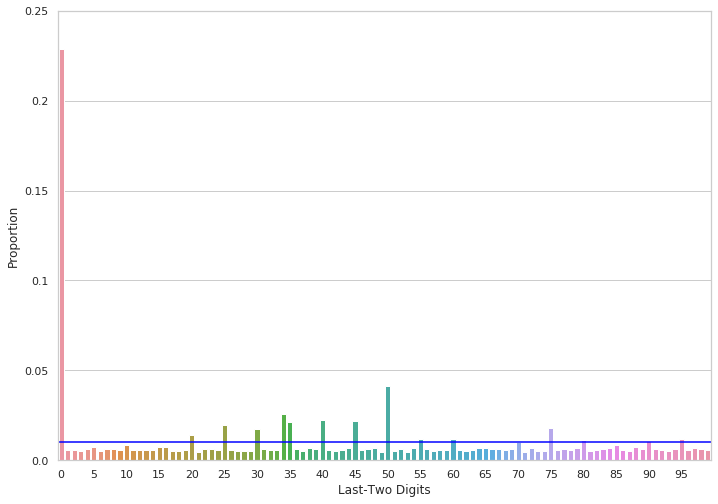

In [14]:
sns.set(style='whitegrid') # garis horizontal tiap 0.05
a4_dims = (11.7, 8.27) # ukuran grafik
plt.figure(figsize=a4_dims)
ax = sns.barplot(y="proportion", x="LastTwo", data=data2)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) # Label x akan diberikan tiap 5
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set(xlabel='Last-Two Digits', ylabel='Proportion') # Title pada x dan y

ax.axhline(1, color='blue') # garis horizontal pada nilai y 1 (0.01)

plt.yticks(ax.get_yticks(), ax.get_yticks() / 100) # label y akan dibagi 100

plt.show()

# Membuat bins

In [15]:
bins = [i for i in range(0, 101)]
labels = [str(i) for i in range(0, 100)]

In [16]:
data['bins'] = pd.cut(data['LastTwo'], bins, labels=labels, include_lowest=True, right=False)

In [17]:
data

,ID,Amount,Amount100,LastTwo,bins
0,1,25.19,"2,519.00",19,19
1,2,25.86,"2,586.00",86,86
2,3,26.57,"2,657.00",57,57
3,4,27.83,"2,783.00",83,83
4,5,28.09,"2,809.00",9,9
...,...,...,...,...,...
189464,189465,11.88,"1,188.00",88,88
189465,189466,33.46,"3,346.00",46,46
189466,189467,61.52,"6,152.00",52,52
189467,189468,12.36,"1,236.00",36,36


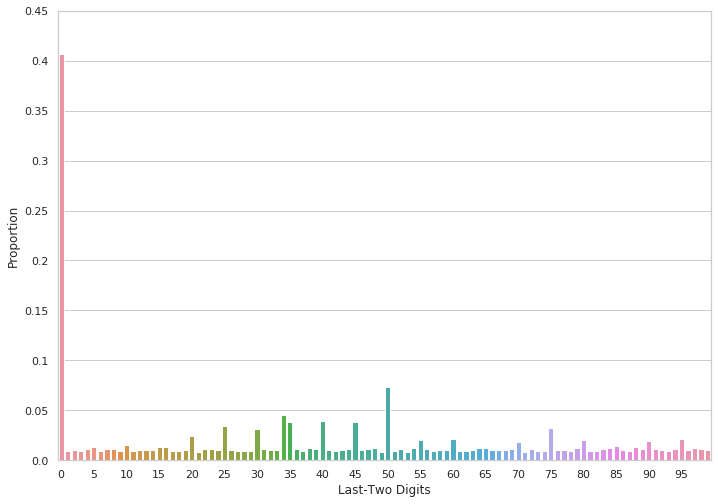

In [18]:
a4_dims = (11.7, 8.27) # ukuran grafik
plt.figure(figsize=a4_dims)
ax = sns.countplot(x="LastTwo", data=data)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set(xlabel='Last-Two Digits', ylabel='Proportion') # label

plt.yticks(ax.get_yticks(), ax.get_yticks() / 100000)

plt.show()

In [19]:
data2 = data[['LastTwo', 'ID']].groupby('LastTwo', as_index=False).count()
data2.rename(columns={'ID': 'Count'}, inplace=True)

In [20]:
data2

,LastTwo,Count
0,0,40684
1,1,974
2,2,1065
3,3,890
4,4,1149
...,...,...
95,95,2153
96,96,1014
97,97,1212
98,98,1148


In [21]:
data2['proportion'] = data2['Count']/data2['Count'].sum()*100

In [22]:
data2

,LastTwo,Count,proportion
0,0,40684,22.89
1,1,974,0.55
2,2,1065,0.60
3,3,890,0.50
4,4,1149,0.65
...,...,...,...
95,95,2153,1.21
96,96,1014,0.57
97,97,1212,0.68
98,98,1148,0.65


In [23]:
data2['idealprop'] = 1

In [24]:
data2

,LastTwo,Count,proportion,idealprop
0,0,40684,22.89,1
1,1,974,0.55,1
2,2,1065,0.60,1
3,3,890,0.50,1
4,4,1149,0.65,1
...,...,...,...,...
95,95,2153,1.21,1
96,96,1014,0.57,1
97,97,1212,0.68,1
98,98,1148,0.65,1


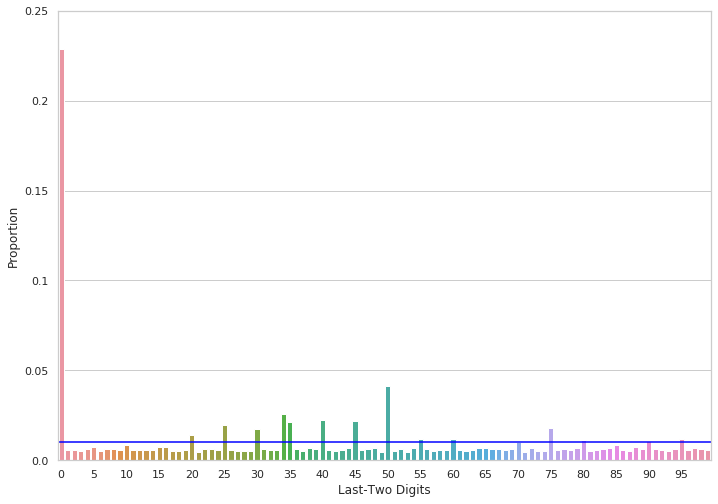

In [25]:
sns.set(style='whitegrid')
a4_dims = (11.7, 8.27) # ukuran grafik
plt.figure(figsize=a4_dims)
ax = sns.barplot(y="proportion", x="LastTwo", data=data2)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set(xlabel='Last-Two Digits', ylabel='Proportion') # label
ax.axhline(1, color='blue')

plt.yticks(ax.get_yticks(), ax.get_yticks() / 100)

plt.show()